Generando datos sintéticos
Forma de x: (100, 1)
Forma de y: (100, 1)

Ajustando el modelo de regresión lineal

Forma de la Matriz de Diseño X: (100, 2)
Forma de X.T: (2, 100)
Forma de (X.T @ X): (2, 2)
Forma de (X.T @ X)^-1: (2, 2)
Forma de (X.T @ y): (2, 1)
Forma del vector de parámetros beta: (2, 1)

Parámetros del modelo (beta): [4.21509616 2.54022677]
Intercección (beta_0): 4.2151
Pendiente (beta_1): 2.5402

Graficando los resultados


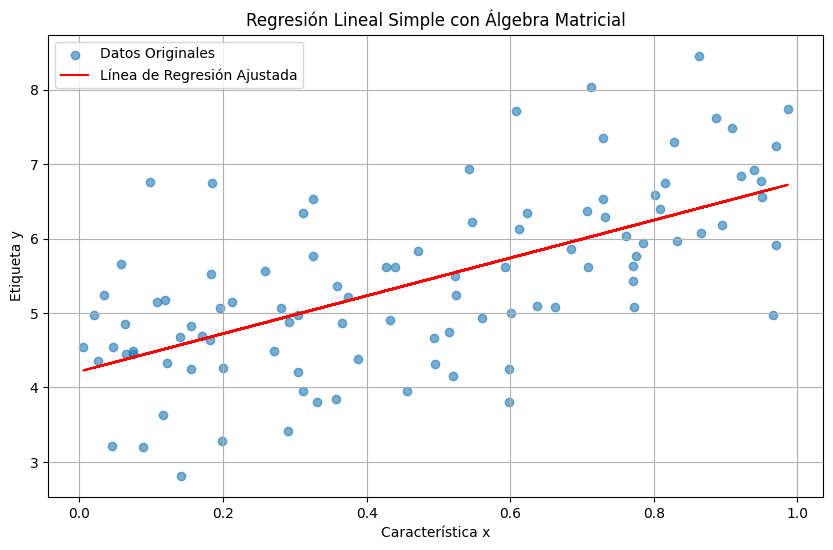

In [1]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(42) para garantizar la reproducibilidad de los resultados.
# Si se quieren datos distintos cada vez, la siguiente línea se comenta o elimina.
np.random.seed(42)

# Se define la cantidad de puntos de datos puntos de datos.
n = 100


def generar_datos(n=100):
    """
    Crea dos vectores 'x' e 'y' que representan una relación lineal con ruido gaussiano para que no sean datos "uniformes".

    Parámetros o argumentos:
    n (int): Número de puntos de datos a generar. Se definióantes como 100.

    Retorno:
    Una tupla que contiene los arrays numpy x y y.
    """
    # Generar x como np.random.rand(n, 1). Esto produce valores entre 0 y 1 con forma (100, 1) y crea el ruido gaussiano.
    x = np.random.rand(n, 1)

    # Obtener y: y = 4 + 3x + N(0,1)
    y = 4 + 3 * x + np.random.randn(n, 1)

    print(f"Forma de x: {x.shape}")
    print(f"Forma de y: {y.shape}")
    return x, y


def ajustar_modelo(x, y):
    """
    Calcula el vector de parámetros beta para una regresión lineal utilizando álgebra matricial.

    El modelo utilizado es beta = (X.T @ X)^-1 @ X.T @ y

    Parámetros:
    x (np.array): Array de características.
    y (np.array): Array de valores observados (etiquetas).

    Retorna:
    np.array: El vector de parámetros ajustados (beta).

     Se añade una columna de unos a X para el término de intercepción (bias).
     Esto es crucial para que el modelo pueda ajustar una línea que no pase por el origen.
     Desde la perspectiva de ML, el término de intercepción permite que la recta de regresión
     se desplace verticalmente, ajustándose mejor a los datos.
    """

    X = np.hstack([np.ones((n, 1)), x])
    print(f"\nForma de la Matriz de Diseño X: {X.shape}")

    """
     Calcular X.T (transpuesta de X).
     La transpuesta es necesaria para las operaciones matriciales subsiguientes.
     En ML, las operaciones con transpuestas son comunes para alinear dimensiones.
    """
    XT = X.T
    print(f"Forma de X.T: {XT.shape}")

    """
     Calcular (X.T @ X)
     Este producto es una parte fundamental de la ecuación de la forma normal
     y ayuda a construir una matriz que encapsula las relaciones entre las características.
    """
    XTX = XT @ X
    print(f"Forma de (X.T @ X): {XTX.shape}")

    """
     Calcular la inversa de (X.T @ X).
     La inversa es necesaria para "deshacer" la operación de multiplicación matricial y
     aislar el vector de parámetros beta. En ML, el cálculo de la inversa es una
     operación costosa computacionalmente pero directa para la solución de forma cerrada.
    """
    try:
        XTX_inv = np.linalg.inv(XTX)
        print(f"Forma de (X.T @ X)^-1: {XTX_inv.shape}")
    except np.linalg.LinAlgError:
        print("Error: La matriz (X.T @ X) no es invertible. Esto puede ocurrir si hay colinealidad perfecta en los datos.")
        return None

    """
     Calcular (X.T @ y)
     Este producto relaciona las características con los valores observados.
    """
    XTY = XT @ y
    print(f"Forma de (X.T @ y): {XTY.shape}")

    """
     Calcular beta = (X.T @ X)^-1 @ X.T @ y
     Esta es la solución de mínimos cuadrados ordinarios en forma matricial.
     Desde la perspectiva de ML, beta contiene los pesos que minimizan la suma
     de los errores cuadrados entre las predicciones y los valores reales.
    """
    beta = XTX_inv @ XTY
    print(f"Forma del vector de parámetros beta: {beta.shape}")

    return beta


def graficar_resultado(x, y, beta):
    """
    Grafica los datos originales y la recta de regresión ajustada.

    Parámetros:
    x (np.array): Array de características originales.
    y (np.array): Array de valores observados originales.
    beta (np.array): Vector de parámetros ajustados [intercepción, pendiente].
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Datos Originales", alpha=0.6)
    """
     Calcular las predicciones usando los parámetros beta.
     y_pred = beta[0] (intercepción) + beta[1] * x (pendiente * característica)
     Esto representa la línea recta que el modelo ha aprendido.
    """
    y_pred = beta[0] + beta[1] * x
    plt.plot(x, y_pred, color="red", label="Línea de Regresión Ajustada")

    plt.xlabel("Característica x")
    plt.ylabel("Etiqueta y")
    plt.title("Regresión Lineal Simple con Álgebra Matricial")
    plt.legend()
    plt.grid(True)
    plt.show()


# Ejecución del Sistema
if __name__ == "__main__":
    print("Generando datos sintéticos")
    x_data, y_data = generar_datos(n)

    print("\nAjustando el modelo de regresión lineal")
    beta_params = ajustar_modelo(x_data, y_data)

    if beta_params is not None:
        print(f"\nParámetros del modelo (beta): {beta_params.flatten()}")
        print(f"Intercección (beta_0): {beta_params[0][0]:.4f}")
        print(f"Pendiente (beta_1): {beta_params[1][0]:.4f}")

        print("\nGraficando los resultados")
        graficar_resultado(x_data, y_data, beta_params)